<a href="https://colab.research.google.com/github/karaogluhh/Computer-Vision-Notes/blob/main/OpenCV_Official_Tutorials_Image_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2

- `cv2.threshold`
  - `cv.THRESH_BINARY`
  - `cv.THRESH_BINARY_INV`
  - `cv.THRESH_TRUNC`
  - `cv.THRESH_TOZERO`
  - `cv.THRESH_TOZERO_INV`

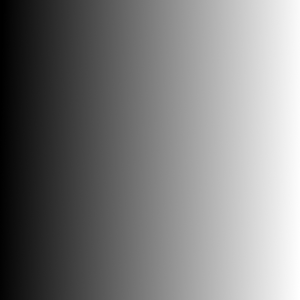

In [4]:
im = cv2.imread("gradient.png", cv2.IMREAD_GRAYSCALE)
cv2_imshow(im)

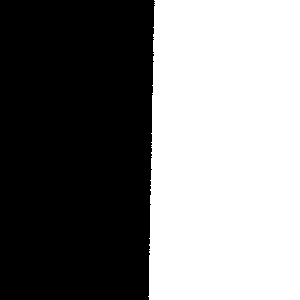

In [5]:
ret, threshold1 = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(threshold1)

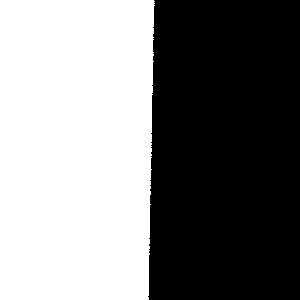

In [6]:
ret, threshold2 = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(threshold2)

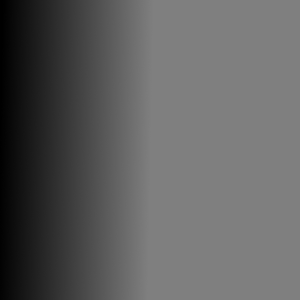

In [7]:
ret, threshold3 = cv2.threshold(im, 127, 255, cv2.THRESH_TRUNC)
cv2_imshow(threshold3)

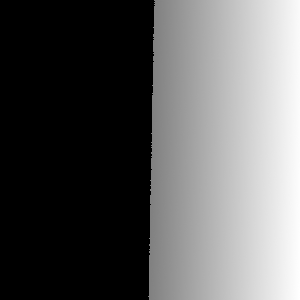

In [8]:
ret, threshold4 = cv2.threshold(im, 127, 255, cv2.THRESH_TOZERO)
cv2_imshow(threshold4)

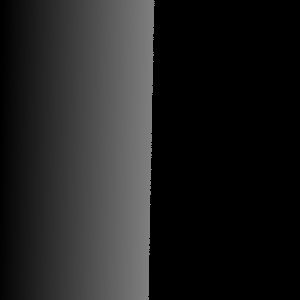

In [9]:
ret,threshold5 = cv2.threshold(im,127,255,cv2.THRESH_TOZERO_INV)
cv2_imshow(threshold5)

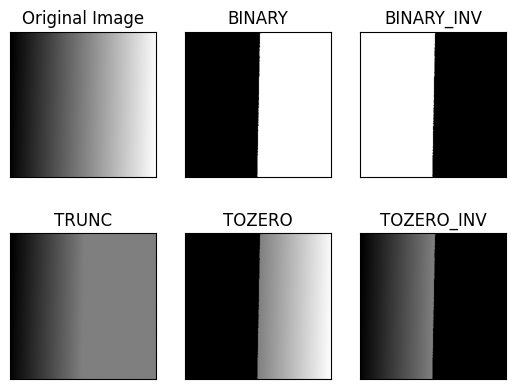

In [10]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [im, threshold1, threshold2, threshold3, threshold4, threshold5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## Adaptive Thresholding

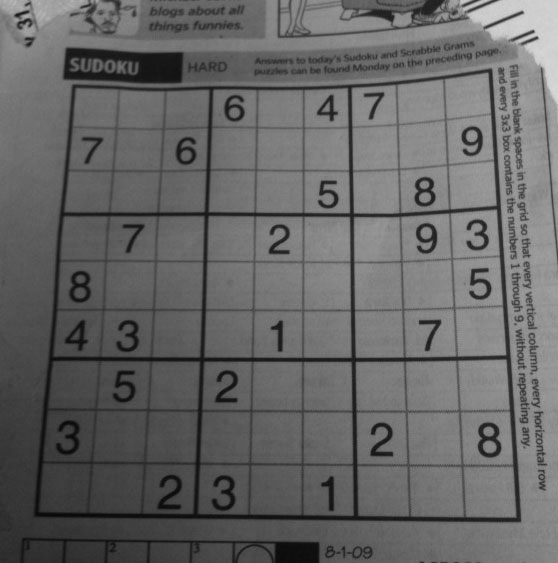

In [11]:
im = cv2.imread('sudoku.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(im)

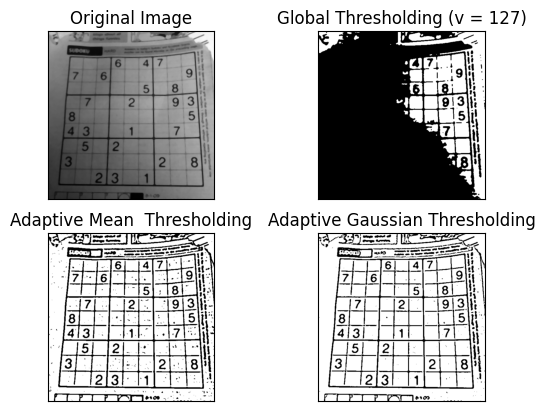

In [14]:
im = cv2.medianBlur(im, 5)

ret, th1 = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean  Thresholding', 'Adaptive Gaussian Thresholding']
images = [im, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


## Otsu's Binarization

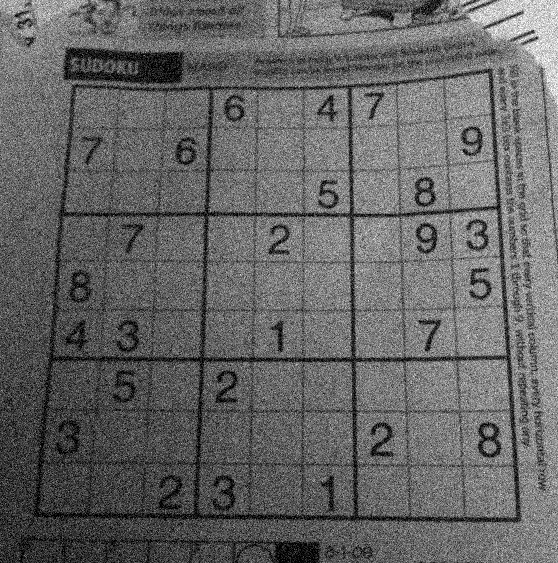

In [27]:
im = np.float32(cv2.imread('sudoku.png', cv2.IMREAD_GRAYSCALE))
im = im + 25 * np.random.randn(im.shape[0], im.shape[1])
cv2_imshow(im)

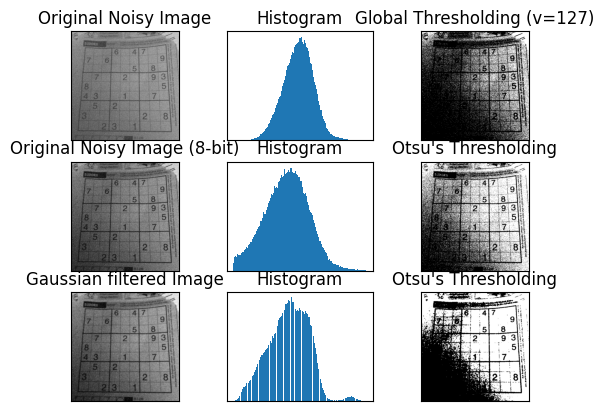

In [29]:
# global thresholding
ret1,th1 = cv2.threshold(im,127,255,cv2.THRESH_BINARY)

# Convert image to 8-bit unsigned integer
im_8u = cv2.convertScaleAbs(im)

# Otsu's thresholding
ret2,th2 = cv2.threshold(im_8u,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(im_8u,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [im, 0, th1,
          im_8u, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image (8-bit)','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()